In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

## 8.1. Curse of Dimensionality

* instance 갯수 대비 feature의 갯수가 지나치게 많은 경우 '차원의 저주' 현상이 발생함.
* MNIST를 상기해보면 흰 배경은 feature importance가 떨어지기 때문에 해당 pixel을 제거하거나 다른 pixel과 병합하여 '차원의 저주' 현상에 대처함.
* data visualization을 통해 insight를 얻을 때도 차원축소기법이 활용됨.

* 단위면적(1x1 사각형) 내 무작위로 점을 선택한다면 경계선에서 .001 이내에 위치할 가능성이 .4%임
* 그러나 10000차원의 단위면적을 가진 초입방체에서는 그 가능성이 99.99%보다 커짐  
  
  
* 단위면적에서 임의의 두 점을 선택하면 두 점 사이의 거리는 .52임
* 3차원 큐브에서는 .66이고, 1,000,000차원 초입방체에서의 거리는 408.25임.
  
  
* feature space가 더욱 고차원일수록 특정 instance의 발생/관측 확률은 더욱 희박해지며 각각의 instance간의 거리는 더욱 커짐.
* 이론적으로 이를 해결하기 위한 방안은 instance의 갯수를 feature space을 가득 메울 정도로 늘리는 것.
* 그러나 차원의 수가 커질수록 필요한 sample의 수는 기하급수적으로 늘어나기 때문에 불가능하며 feature space를 축소하는 것이 대안.

## 8.2.1. projection

* 대부분의 sample들은 feature space 전반에 고루 분포하지 않으며 feature간의 상관관계가 또렷한 경우가 잦음.
* 이는 즉 고차원의 feature space에 instance가 존재하지만 subspace에 밀집해있다는 얘기

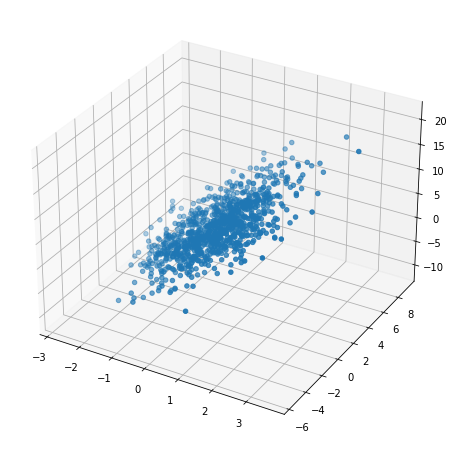

In [2]:
x1 = np.random.randn(1000)
x2 = 2 * np.random.randn(1000) + 2
y = 4 * x1 + x2 + np.random.randn(1000)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1,x2,y)

## 8.2.2. manifold learning

* 특정 instance는 projection만으로는 feature importance를 잘 보전하면서 차원축소를 진행할 수 없음.
* 아래 swiss roll dataset처럼 국소적으로는 2d 평면이지만 3차원 공간에서 말려있는 경우 manifold를 통해 펼쳐줄 수 있음.
* 이 때 '실제 고차원 dataset이 저차원 manifold에 가깝게 놓여 있다"는 가정에 근거하여 manifold learning을 진행함.  

* 다만 이러한 가정이 항상 옳은것은 아니기 때문에 dimension reduction이 훈련속도 향상으로 이어지지만 항상 최적값은 아님.

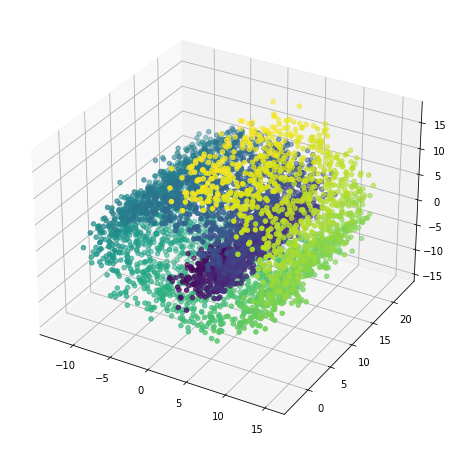

In [3]:
x, t = datasets.make_swiss_roll(n_samples=5000, noise=1., random_state=42)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x.T[0], x.T[1], x.T[2], c=t)

## 8.3. PCA

$\min \frac{1}{N} \sum_i\left(d_i-d_i^{\top} u \cdot u\right)^{\top}\left(d_i-d_i^{\top} u \cdot u\right)$

* 위 최적화 공식을 만족하는 vector $u$를 찾는 것이 PCA 알고리즘
* 이는 Least Square를 푸는 것과 비슷한 형식. 분산이 가장 큰 방향의 vector가 principal component 역할을 한다는 내용

In [94]:
x = np.random.randn(400,1)
y = 2 * x + np.random.randn(400,1) 
X = np.concatenate((x,y),axis=1)
X_centered = X - X.mean(axis=0)

U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]; c2 = Vt.T[:, 1]

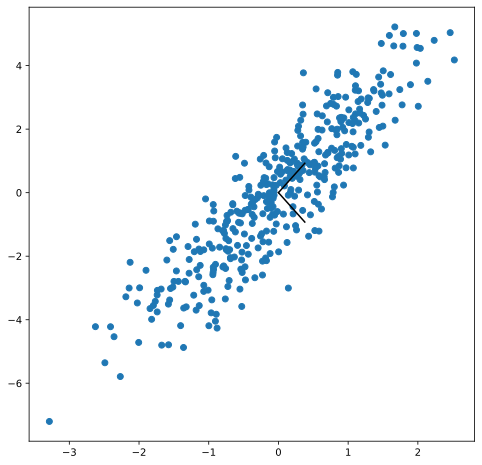

In [109]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_centered.T[0], X_centered.T[1])
ax.plot((0,c1[0]), (0,c1[1]), 'black'); ax.plot((0,c2[1]), (0,c2[0]), c='black')

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [7]:
pca.explained_variance_ratio_

array([0.97436198, 0.02563802])

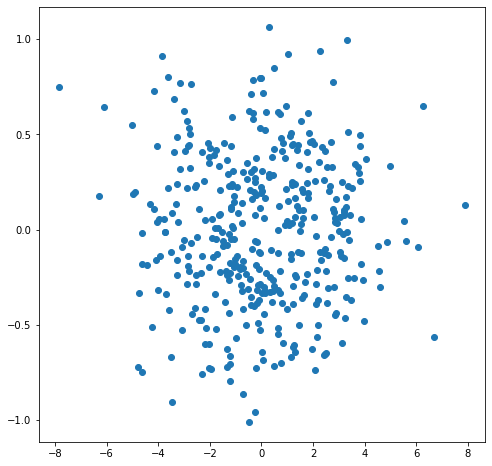

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X2D.T[0], X2D.T[1])
#ax.plot((0,c1[0]), (0,c1[1]), 'black'); ax.plot((0,c2[0]), (0,c2[1]), c='black')

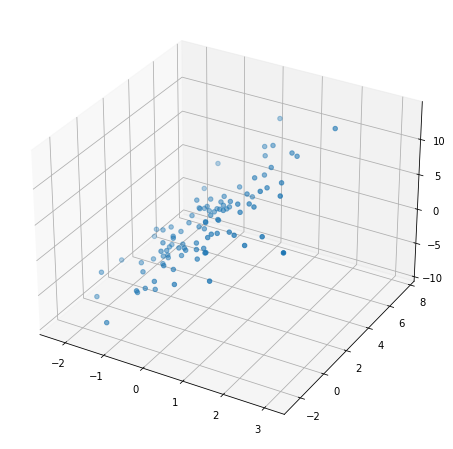

In [9]:
x1 = np.random.randn(100,1)
x2 = 2 * np.random.randn(100,1) + 2
y = 4 * x1 + x2 + np.random.randn(100,1)

X = np.concatenate((x1,x2,y),axis=1)
X_centered = X - X.mean(axis=0)

U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]; c2 = Vt.T[:, 1]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1,x2,y)

In [10]:
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)

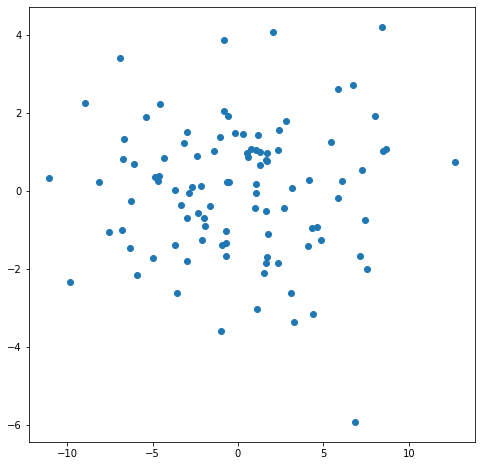

In [11]:
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(X2D.T[0], X2D.T[1])

In [12]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= .95) + 1

pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X)

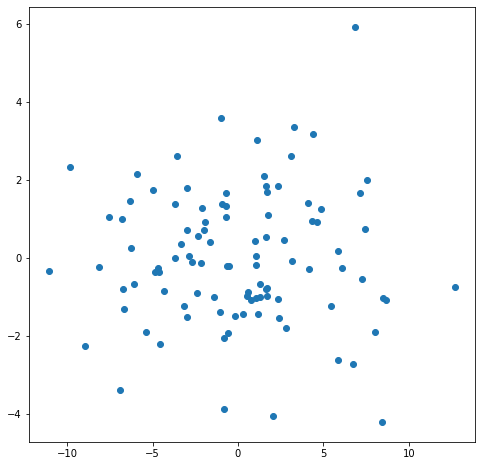

In [13]:
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(X_reduced.T[0], X_reduced.T[1])

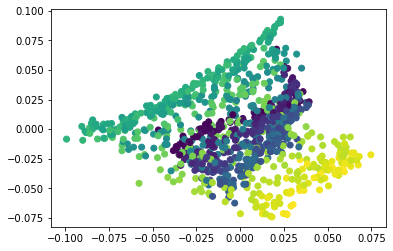

In [28]:
from sklearn.manifold import LocallyLinearEmbedding

X, t = datasets.make_swiss_roll(n_samples=1000, noise=1., random_state=42)


lle =LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

plt.scatter(X_reduced.T[0], X_reduced.T[1], c=t)

## Problem2

In [47]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)  # download MNIST
N = 6000 

x = mnist_trainset.data[:N]  # select N datapoints
x = x.flatten(1)             # flatten the images
x = x.float()                # convert pixels from uint8 to float
# x = x.numpy()              # uncomment to use numpy (optional)
x /= 255

In [90]:
def pca(x, n_comps=500):
    x_centered = x - x.mean(axis=0)
    U, s, Vt = np.linalg.svd(x_centered)
    top_eigvals = s[:n_comps]
    top_pcomps = Vt[:n_comps]
    return top_eigvals, top_pcomps

def calc_cfvs(eigvals):
    total = np.sum(np.square(eigvals)); prop = np.square(eigvals)/total
    cum_frac_vars = np.cumsum(prop)
    return cum_frac_vars

def calc_errs(x, pcomps):
    x_proj = np.array(x_centered).dot(pcomps[:10].T)
    x_recv = x_proj.dot(pcomps[:10])
    err_mean = np.square(np.subtract(x, x.mean(axis=0))).mean()
    err_pcomp = np.square(np.subtract(x, x_recv)).mean()
    return err_mean, err_pcomp

def plot_pic(pic, ax, title=''):
    x = pic.reshape(28, 28)
    ax.imshow(x, cmap='binary')
    ax.set_title(title)
    ax.axis('off')

def make_plots(eigvals, cfvs, x_mean, pcomps):
    # plot eigenvals and cfvs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    ax1.plot(eigvals, color='tomato')
    ax1.set_title('Eigenvalues')
    ax2.plot(cfvs, color='tomato')
    ax2.set_title('CFVs')
    fig.savefig('p2_cfvs.pdf')

    # plot mean
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    plot_pic(x_mean, ax, title='Mean')
    fig.savefig('p2_mean.pdf')

    # plot top 10 pcomps
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        plot_pic(pcomps[i], axes.flat[i], title=f'PC index {i}')
    fig.savefig('p2_pcomps.pdf')

Reconstruction error (using mean): 6.739996e-02
Reconstruction error (using mean and top 10 pcomps): 7.931291e-02


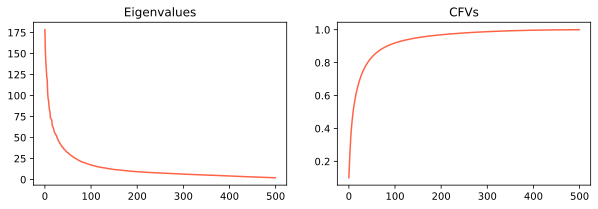

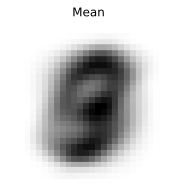

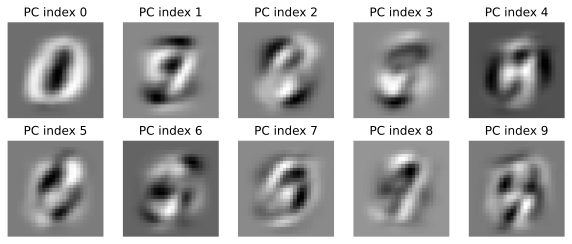

In [91]:
# do PCA
eigvals, pcomps = pca(x)

# calculate CFVs
fcvs = calc_cfvs(eigvals)

# print errors
err_mean, err_pcomp = calc_errs(x, pcomps)
print(f'Reconstruction error (using mean): {err_mean:3e}')
print(f'Reconstruction error (using mean and top 10 pcomps): {err_pcomp:3e}')

# make plots
make_plots(eigvals, fcvs, x.mean(0), pcomps)

In [110]:
from sklearn.cluster import KMeans

x_cent = x - x.mean(axis=0)
kmeans = KMeans(n_clusters = 10)
kmeans.fit(x_cent)

C:\Users\tasty\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=10)

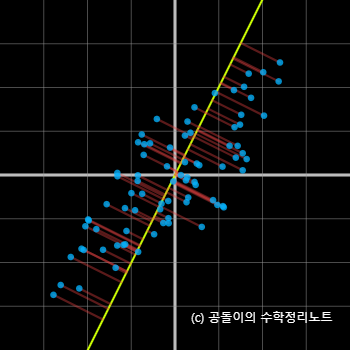

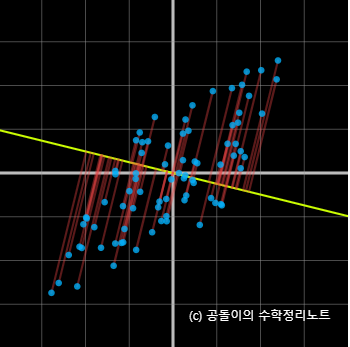